# Segemntacja za pomocą k-Średnich po feature engineeringu za pomocą analizy RFM na całym okresie - Paźdzernik-Kwiecień.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style('ticks')

Załadowanie wyczyszczonego data frame'u

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/all_months_rfm.csv", index_col=0)
df

,user_id,recency,frequency,monetary
0,101875240,105,1,184.52
1,107620212,91,1,244.28
2,128968633,121,3,358.79
3,136662675,139,1,102.65
4,145611266,16,2,81.56
...,...,...,...,...
1817168,649770286,0,1,948.77
1817169,649770487,0,1,143.89
1817170,649770848,0,2,700.10
1817171,649771260,0,1,353.77


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817173 entries, 0 to 1817172
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1817173 non-null  int64  
 1   recency    1817173 non-null  int64  
 2   frequency  1817173 non-null  int64  
 3   monetary   1817173 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 69.3 MB


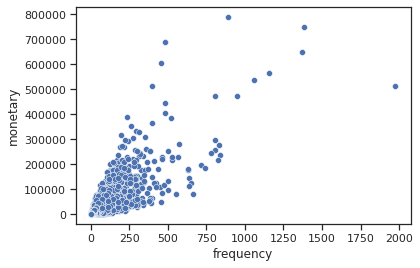

In [ ]:
sns.scatterplot(x='frequency', y='monetary', data=df)
plt.show()

Usunięcie `user_id`, żeby dodać ją później

In [ ]:
df_id = df["user_id"].copy()
df.drop("user_id", axis=1, inplace=True)
df

,recency,frequency,monetary
0,105,1,184.52
1,91,1,244.28
2,121,3,358.79
3,139,1,102.65
4,16,2,81.56
...,...,...,...
1817168,0,1,948.77
1817169,0,1,143.89
1817170,0,2,700.10
1817171,0,1,353.77


Usunięcie wartości skrajnych - zaniechane - większa ilość braków danych w przypadku przewidywania

In [ ]:
# df_rfm = df_rfm.loc[(df_rfm['frequency'] < 200) & (df_rfm['monetary'] < 150000)]

# sns.scatterplot(x='frequency', y='monetary', data=df_rfm)
# plt.show()

Standaryzacja

In [ ]:
standard_scaler = StandardScaler()
df_rfm_stan = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_rfm_stan

,recency,frequency,monetary
0,0.292164,-0.274084,-0.227396
1,0.061705,-0.274084,-0.211648
2,0.555546,-0.018062,-0.181473
3,0.851850,-0.274084,-0.248971
4,-1.172896,-0.146073,-0.254528
...,...,...,...
1817168,-1.436278,-0.274084,-0.026002
1817169,-1.436278,-0.274084,-0.238103
1817170,-1.436278,-0.146073,-0.091531
1817171,-1.436278,-0.274084,-0.182796


### Test `silhouette_scores` i `inertia` dla 0.3 części wierszy, `n_init`=5, żeby skrócić czas wykonywania.

In [ ]:
test_df = df_rfm_stan.sample(frac=0.3, random_state=1)
test_df

,recency,frequency,monetary
1603000,-0.465058,-0.274084,-0.230674
607515,0.160474,1.390055,1.944267
1609309,-1.370432,0.237959,0.025659
1747974,-1.139973,-0.274084,-0.222434
1442744,0.094628,-0.146073,-0.112810
...,...,...,...
438666,-0.185215,-0.146073,0.033277
1264381,-0.267522,-0.274084,-0.228545
1427087,-0.925976,-0.274084,-0.240124
711704,-0.596749,-0.274084,-0.261369


In [ ]:
# silhouette score
kmeans_per_k = [KMeans(n_clusters=k, n_init=5).fit(test_df)
                 for k in range(2, 6)]
silhouette_scores = [silhouette_score(test_df, model.labels_)
                     for model in kmeans_per_k]

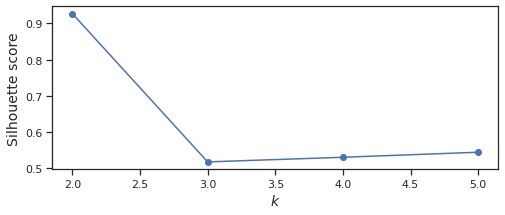

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 6), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.savefig("silhouette.png")
plt.show()

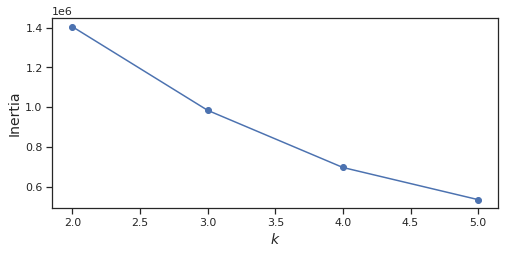

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 6), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.savefig("inertia.png")
plt.show()

### Wyznaczenie liczby `k` - dla jednego miesiąca

In [ ]:
# silhouette score
kmeans_per_k = [KMeans(n_clusters=k).fit(df_rfm_stan)
                for k in range(2, 5)]
silhouette_scores = [silhouette_score(df_rfm_stan, model.labels_)
                     for model in kmeans_per_k]

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.savefig("silhouette.png")
plt.show()

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.savefig("inertia.png")
plt.show()

### Model i wizualizacje dla 3 klastrów

In [ ]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=30)
k_means.fit(df_rfm_stan)
labels = k_means.labels_
df["clusters_3"] = labels
df["user_id"]= df_id
# df = df.sort_values("clusters_3")
df

,recency,frequency,monetary,clusters_3,user_id
0,105,1,184.52,0,101875240
1,91,1,244.28,1,107620212
2,121,3,358.79,0,128968633
3,139,1,102.65,0,136662675
4,16,2,81.56,1,145611266
...,...,...,...,...,...
1817168,0,1,948.77,1,649770286
1817169,0,1,143.89,1,649770487
1817170,0,2,700.10,1,649770848
1817171,0,1,353.77,1,649771260


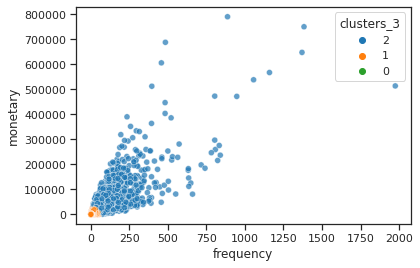

In [ ]:
df['clusters_3'] = df["clusters_3"].astype(str)
sns.scatterplot(x='frequency', y='monetary', data=df, hue='clusters_3', 
                hue_order=["2", "1", "0"], palette='tab10', alpha=0.7)
plt.show()

In [ ]:
df.groupby('clusters_3')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters_3,,,,,,,,
0,797824.0,670.609483,1207.917585,0.77,146.700,291.68,730.4725,27813.39
1,1011106.0,1066.808045,2018.441880,0.42,168.060,398.68,1029.3400,28615.34
2,8243.0,35144.446646,36842.733078,779.31,18899.655,26843.23,38489.7950,790098.29


In [ ]:
df.groupby('clusters_3')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters_3,,,,,,,,
0,797824.0,146.929216,32.450206,92.0,122.0,142.0,170.0,212.0
1,1011106.0,40.440817,27.856254,0.0,15.0,40.0,63.0,142.0
2,8243.0,53.069514,42.255729,0.0,23.0,44.0,74.0,208.0


In [ ]:
df.groupby('clusters_3')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters_3,,,,,,,,
0,797824.0,2.045224,2.432289,1.0,1.0,1.0,2.0,60.0
1,1011106.0,3.414118,4.727766,1.0,1.0,2.0,4.0,67.0
2,8243.0,75.719884,68.892503,15.0,44.0,60.0,84.0,1975.0


Wykres 3D

In [ ]:
fig = px.scatter_3d(df, x='recency', y='frequency', z='monetary',
                    color='clusters_3', opacity=0.7)
fig.show()

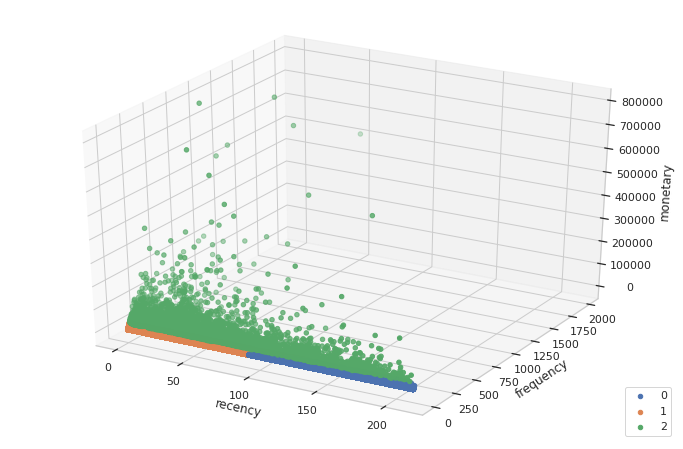

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure()
sns.set(style = "whitegrid")
ax = fig.add_subplot(projection='3d')

for s in df.clusters_3.unique():
    ax.scatter(df.recency[df.clusters_3==s], df.frequency[df.clusters_3==s], df.monetary[df.clusters_3==s], label=s)

ax.legend(loc="lower right")
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary", labelpad=15)
ax.tick_params(axis="z",direction="out", pad=10)
fig.savefig("segments.png")
fig.show()

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,recency,frequency,monetary,clusters_3,user_id
0,105,1,184.52,0,101875240
1,91,1,244.28,1,107620212
2,121,3,358.79,0,128968633
3,139,1,102.65,0,136662675
4,16,2,81.56,1,145611266
...,...,...,...,...,...
1817168,0,1,948.77,1,649770286
1817169,0,1,143.89,1,649770487
1817170,0,2,700.10,1,649770848
1817171,0,1,353.77,1,649771260


In [ ]:
df.to_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/all_customers_with_segments.csv")

### Model i wizualizacje dla 4 klastrów

In [ ]:
clusterNum = 4
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=30)
k_means.fit(df_rfm_stan)
labels = k_means.labels_
df_rfm["clusters_4"] = labels
df_rfm = df_rfm.sort_values("clusters_4")

In [ ]:
df_rfm['clusters_4'] = df_rfm["clusters_4"].astype(str)
sns.scatterplot(x='frequency', y='monetary', data=df_rfm, hue='clusters_4', 
                hue_order=[ "3", "2", "1", "0"], palette='tab10')
plt.show()

In [ ]:
df_rfm.groupby('clusters_4')['monetary'].describe()

Wykres 3D

In [ ]:
# fig = px.scatter_3d(df_rfm, x='recency', y='frequency', z='monetary',
#                     color='clusters_4', opacity=0.7)
# fig.show()

In [ ]:
df_rfm.head()

In [ ]:
# df_rfm.to_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2019-Oct_clean_with_segments_4.csv")